In [2]:
!pip install py-tgb

In [3]:
from tgb.nodeproppred.dataset import NodePropPredDataset

name = "tgbn-genre"

dataset = NodePropPredDataset(name=name, root="datasets", preprocess=True)

data = dataset.full_data

Will you download the dataset(s) now? (y/N)
y
Download started, this might take a while . . . 
Dataset title: tgbn-genre
Download completed 
Dataset directory is  /usr/local/lib/python3.10/dist-packages/tgb/datasets/tgbn_genre
file not processed, generating processed file
number of lines counted 17858395


17858396it [01:37, 183893.73it/s]
2741936it [00:10, 270982.15it/s]


file processed and saved


In [ ]:
data #this is a dictionary sorted by timestamps

{'sources': array([ 513.,  513.,  514., ..., 1210., 1210., 1210.]),
 'destinations': array([ 0.,  0.,  1., ...,  8., 75.,  8.]),
 'timestamps': array([1.10835720e+09, 1.10835720e+09, 1.10835726e+09, ...,
        1.24546122e+09, 1.24546122e+09, 1.24546122e+09]),
 'edge_idxs': array([1.0000000e+00, 2.0000000e+00, 3.0000000e+00, ..., 1.7858393e+07,
        1.7858394e+07, 1.7858395e+07]),
 'edge_feat': array([[0.375     ],
        [0.375     ],
        [0.45248869],
        ...,
        [0.45054945],
        [0.54945055],
        [0.45054945]]),
 'edge_label': array([1., 1., 1., ..., 1., 1., 1.])}

In [10]:
# the time stamp is splitted into three intervals: train, validation and test
# we do EDA and modeling on the train+validation set and do inference on the test dataset
# val_ratio= 0.15, test_ratio=0.15
train_mask = dataset.train_mask
val_mask = dataset.val_mask
test_mask = dataset.test_mask

In [11]:
train_mask

array([ True,  True,  True, ..., False, False, False])

In [20]:
i=0
while train_mask[i]!=False:
  i+=1
print (i) # this is 70% of dataset

12500878


In [24]:
print(train_mask[12500877])
print(train_mask[12500878])

True
False


In [26]:
i=0
while test_mask[i]!=True:
  i+=1
print (i) # this is 15% of dataset

15179638


In [28]:
print(test_mask[15179637])
print(test_mask[15179638])

False
True


In [16]:
import pandas as pd
data['edge_feat']= [x for xs in data['edge_feat'] for x in xs] #edge_feat in in the dictionary data is a list of lists. we need to flatten
df= pd.DataFrame.from_dict(data, orient='columns')

In [ ]:
df
''' this is the whole dataset, souces: users, destinations:genres, sorted by timestamps, edge_idxs: unique label for each edge
    edge_label is 1.0 for everything. can delete this column.
    edge_feat is the percentage of the song belonging to the particular genre
'''

,sources,destinations,timestamps,edge_idxs,edge_feat,edge_label
0,513.0,0.0,1.108357e+09,1.0,0.375000,1.0
1,513.0,0.0,1.108357e+09,2.0,0.375000,1.0
2,514.0,1.0,1.108357e+09,3.0,0.452489,1.0
3,514.0,2.0,1.108357e+09,4.0,0.289593,1.0
4,514.0,3.0,1.108357e+09,5.0,0.257919,1.0
...,...,...,...,...,...,...
17858390,1210.0,8.0,1.245461e+09,17858391.0,0.216495,1.0
17858391,1210.0,75.0,1.245461e+09,17858392.0,0.549451,1.0
17858392,1210.0,8.0,1.245461e+09,17858393.0,0.450549,1.0
17858393,1210.0,75.0,1.245461e+09,17858394.0,0.549451,1.0


In [33]:
df['edge_label'].unique() # we can delete this column

array([1.])

In [34]:
# delete edge_label column
del df['edge_label']

In [35]:
df['timestamps'].describe()

count    1.785840e+07
mean     1.191771e+09
std      3.347773e+07
min      1.108357e+09
25%      1.165822e+09
50%      1.194748e+09
75%      1.221441e+09
max      1.245461e+09
Name: timestamps, dtype: float64

In [36]:
df['destinations'].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [37]:
df['sources'].unique().size

992

In [38]:
with pd.option_context('display.float_format', lambda x: f'{x:,.2%}'):
    display(df['edge_feat'].describe())

count   1,785,839,500.00%
mean               44.05%
std                23.52%
min                10.34%
25%                27.27%
50%                37.74%
75%                52.63%
max               100.00%
Name: edge_feat, dtype: float64

In [40]:
(df['timestamps'].max()-df['timestamps'].min())/(60*60*60*24) #what is the unit for timestamps?

26.447534143518517

# Train, Validation and Test Split

In [42]:
df_train= df.iloc[0:12500878]
df_val= df.iloc[12500878:15179638]
df_test= df.iloc[15179638:]
df_trainandval= df.iloc[0:15179638]

I think we should do EDA with train+val

# User-genre interaction

In [ ]:
df['dest_count']= df.groupby('sources')['destinations'].transform('nunique')
df

,sources,destinations,timestamps,edge_idxs,edge_feat,dest_count
0,513.0,0.0,1.108357e+09,1.0,0.375000,180
1,513.0,0.0,1.108357e+09,2.0,0.375000,180
2,514.0,1.0,1.108357e+09,3.0,0.452489,247
3,514.0,2.0,1.108357e+09,4.0,0.289593,247
4,514.0,3.0,1.108357e+09,5.0,0.257919,247
...,...,...,...,...,...,...
17858390,1210.0,8.0,1.245461e+09,17858391.0,0.216495,121
17858391,1210.0,75.0,1.245461e+09,17858392.0,0.549451,121
17858392,1210.0,8.0,1.245461e+09,17858393.0,0.450549,121
17858393,1210.0,75.0,1.245461e+09,17858394.0,0.549451,121


In [ ]:
df_src_dest_count= df.groupby('sources').agg({'destinations': 'nunique'})
df_src_dest_count

,destinations
sources,
513.0,180
514.0,247
515.0,97
516.0,93
517.0,85
...,...
1500.0,44
1501.0,101
1502.0,3


In [ ]:
mu= df_src_dest_count['destinations'].mean()
df_src_dest_count['destinations'].describe()

count    992.000000
mean     134.836694
std       69.762720
min        1.000000
25%       85.000000
50%      130.000000
75%      176.000000
max      397.000000
Name: destinations, dtype: float64

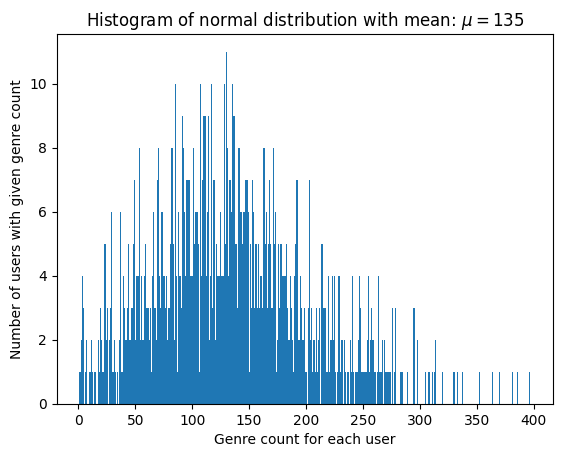

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df_src_dest_count['destinations'],397, density=False)
ax.set_xlabel('Genre count for each user')
ax.set_ylabel('Number of users with given genre count')
ax.set_title('Histogram of normal distribution with mean: '
             fr'$\mu={mu:.0f}$')
plt.show()
